<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Masterclass_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este exercício foi realizado com base no curso Data Science na Prática 3.0 do Sigmoidal.**

# Masterclass Introdução à Visão Computacional - Aula 01


**OpenCV** (Open Source Computer Vision Library) é uma biblioteca *open source* para **Visão Computacional** e **Machine Learning**. O OpenCV foi desenvolvido para facilitar uma infraestrutura comum para aplicações de Visão Computacional e acelerar o uso de percepcão de máquinas em produtos comerciais.

Essa é uma biblioteca importantíssima para ter em seu arsenal, e é definitivamente um ***must*** se você quer se aprofundar em visão computacional.

<p align="center"><img src="https://miro.medium.com/max/3200/0*7s3HcYYvpnUhzDkG.png" width="60%"></p>

Com mais de 2500 algoritmos otimizados, essa biblioteca pode ser usada para detectar e reconhecer faces, identificar objetos, classificar ações humanas em vídeos, acompanhar objetos em movimento, extrair modelos 3D de objetos, acompanhar o movimento dos olhos, reconhecer cenários e estabelecer referências para serem preenchidas com realidade aumentada, entre muitas outras aplicações.

Empresas de todos os tamanhos utilizam OpenCV em sua stack, como Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota, além de startups como Applied Minds, VideoSurf, and Zeitera.


## Iniciando o Projeto

O primeiro passo para começarmos a trabalhar com imagens é carregar as bibliotecas. Aqui, vamos usar algumas velhas conhecidas, e também o OpenCV.

Atenção, pois no Google Colab, não conseguimos usar o imshow direto, por isso, precisamos carregar o patch para que possa ser utilizado.


In [ ]:
# importando bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Para ler imagens, vamos armazenar a mesma em uma variável, e carregar com `cv2.imread`. Esse processo é parecido com a forma que carregamos datasets em csv.

In [ ]:
# ler imagem
img = cv2.imread("img.jpg")

Para visualizar a imagem, basta usar o `cv2_imshow`.

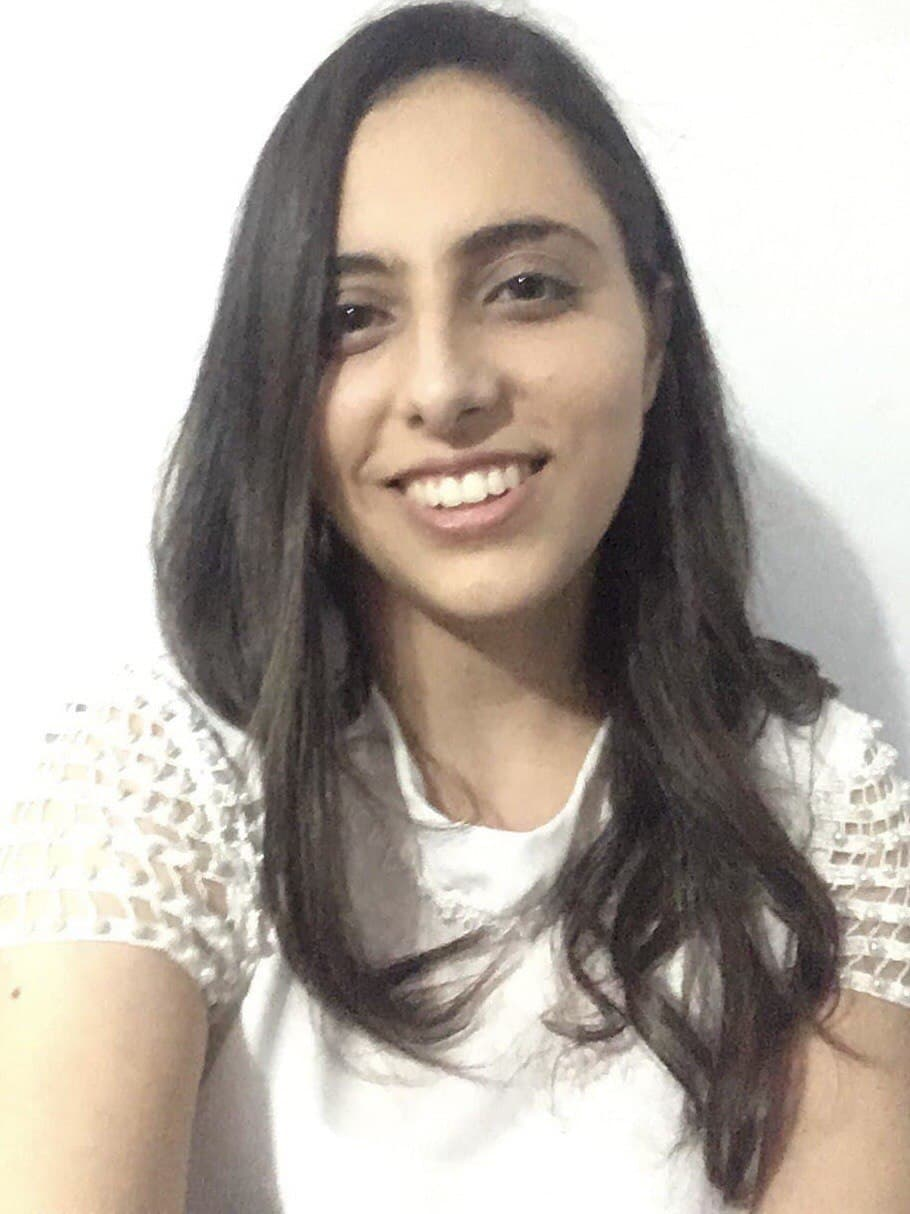

In [ ]:
# visualizando a imagem
cv2_imshow(img)

Temos que lembrar que uma imagem é um array de pixels, distribuídos em canais. Por isso recebemos esses 3 números abaixo.

Portanto, lemos que a nossa imagem tem 915 pixels de altura e de largura, e 3 canais.

In [ ]:
# verificando as dimensões da imagem
img.shape

(1214, 910, 3)

Abaixo, podemos ver a quantidade total de pixels que compõem a nossa imagem.

In [ ]:
# pixels por canal
915 * 915

837225

In [ ]:
# pixels totais
915 * 915 * 3

2511675

Já que estamos falando de um array, é possível acessar pixels individuais.

Entretanto, quando acessamos da forma que está abaixo, estamos buscando a linha de largura (coluna) 100 e altura (linha) 20, ele nos retorna os valores para cada canal dentro desse pixel.

Ou seja, ele retorna os valores RGB para esse pixel.


In [ ]:
# acessar o pixel onde x=100 e y=20
# acessar o pixel de largura=100 e altura=20
img[20, 100]

array([255, 255, 255], dtype=uint8)

Isso significa que no array acima temos:
* B=218 (azul)
* G=196 (verde)
* R=168 (vermelho)

Com isso, podemos também acessar um outro pixel e verificar os valores RGB para ele.

In [ ]:
# acessar o pixel onde x=26 e y=74
# acessar o pixel de largura=26 e altura=74
img[74, 26]

array([255, 255, 255], dtype=uint8)

## Praticando

Um dos poderes do OpenCV é a possibilidade de acrescentar elementos sobre as imagens que manipulamos. Por exemplo, uma caixa para identificar rostos ou objetos.

Abaixo, vamos ter uma introdução de como manipular imagens com o OpenCV.

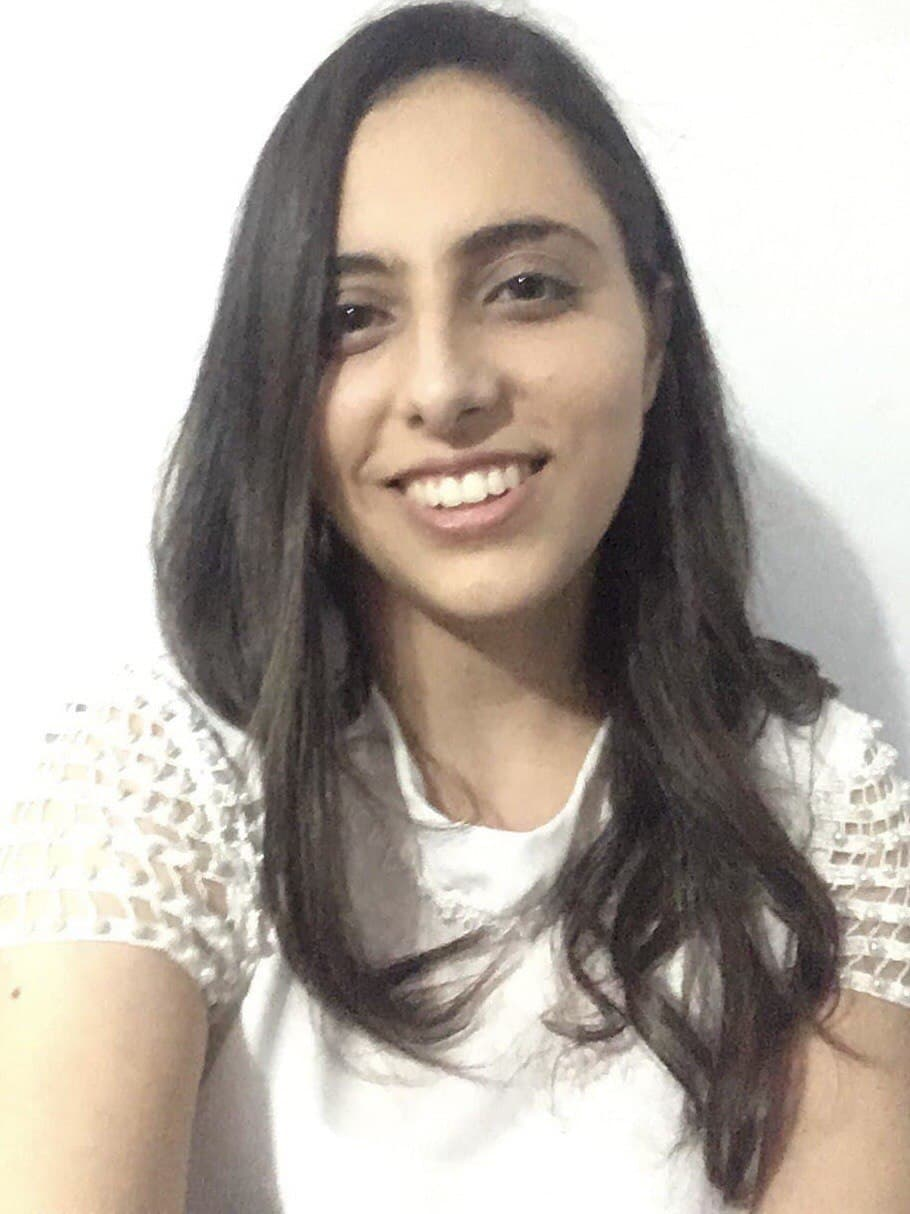

In [ ]:
# plotando a imagem
cv2_imshow(img)

Assim como fazemos com datasets em CSV, é interessante criar cópias para fazer manipulações, por isso, vamos criar uma cópia da nossa imagem antes das manipulações.

As alterações feitas no OpenCV são feitas como que se fosse `inplace`. Por isso, é vital que tenhamos uma cópia, para que tenhamos esse checkpoint.

In [ ]:
# criando uma cópia
img_cp = img.copy()

A primeira tarefa que vamos fazer é desenhar um retângulo. Para isso, vamos usar a função `rectangle`, que toma como argumentos a imagem que será manipulada, o ponto de início, ponto de término, cor do retângulo e grossura do mesmo.

Com isso, temos o resultado abaixo.

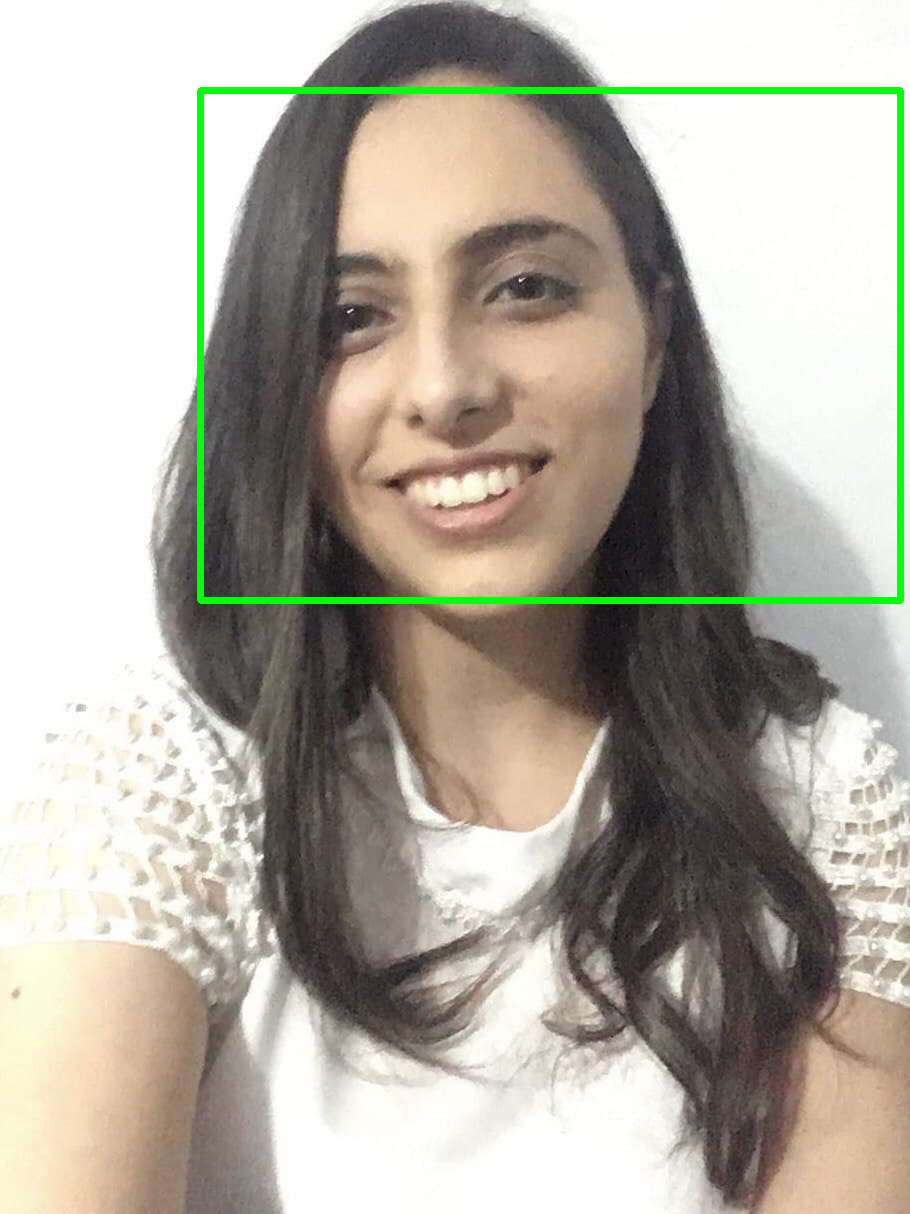

In [ ]:
# imagem, ponto de inicio, nto de termino, cor do retangulo, grossura
cv2_imshow(cv2.rectangle(img_cp, (900, 90), (200, 600), (10, 300, 3), 5))

Por fim, vamos escrever em cima da imagem. Isso seria útil, novamente, em um projeto que identifique pessoas ou objetos, por exemplo.

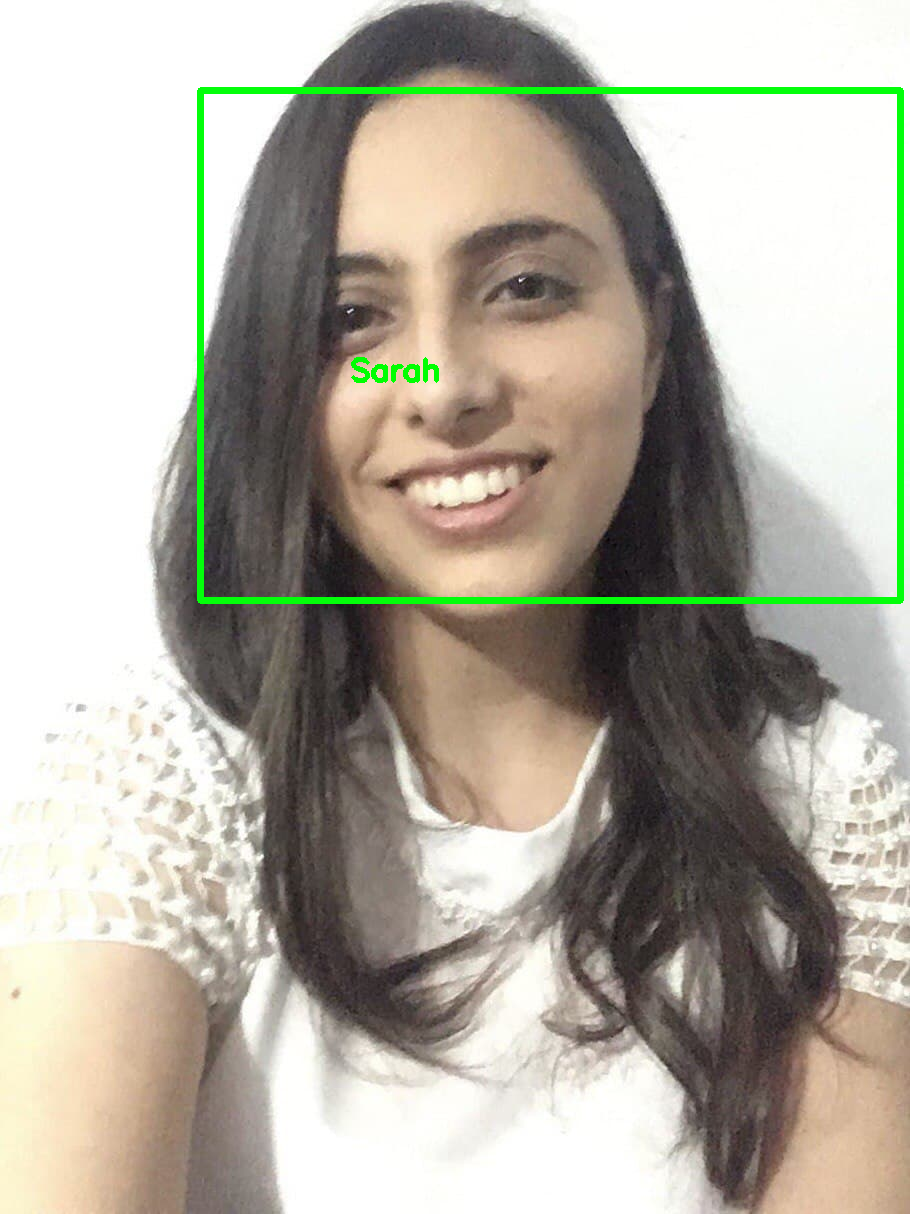

In [ ]:
# fazer copia da imagem
img_cp = img.copy()

# desenhar retangulo
cv2.rectangle(img_cp, (900, 90), (200, 600), (10, 300, 3), 5)

# colocar texto por cima
font = cv2.FONT_HERSHEY_SIMPLEX
cv2_imshow(cv2.putText(img_cp, 'Sarah', (350, 380), font, 1, (0, 255, 0), 3))

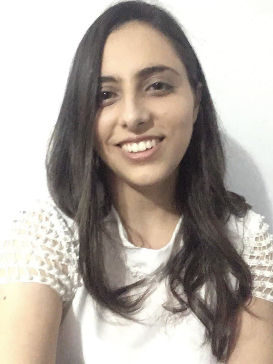

In [102]:
# mudando a escala, ratio

dst_img = cv2.resize(img, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
cv2_imshow(dst_img)

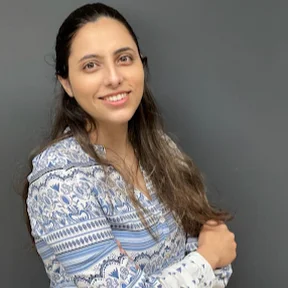

In [121]:
# ler um arquivo
img = cv2.imread("sarah.webp")
cv2_imshow(img)

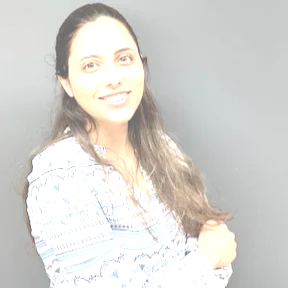

In [124]:
# utilizando o ones do numpy para criar o filtro
filtro_1 = np.ones(img.shape, dtype=np.uint8) * 110

# aplicando o filtro à imagem
somada = cv2.add(img, filtro_1)

# mostrando a imagem com filtro
cv2_imshow(somada)

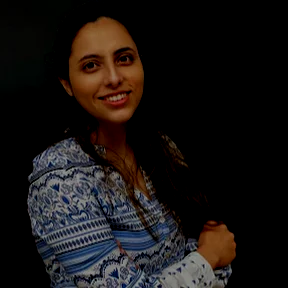

In [125]:
,# criando filtro
filtro_2 = np.ones(img.shape, dtype=np.uint8) * 110

# aplicando filtro
subtraida = cv2.subtract(img, filtro_1)

# imagem com filtro
cv2_imshow(subtraida)

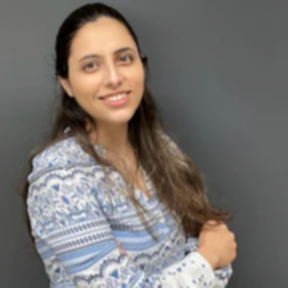

In [126]:
# criando o kernel
kernel_blur = np.ones((3,3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(img, -1, kernel_blur)

# mostrando a imagem com filtro
cv2_imshow(blurred)

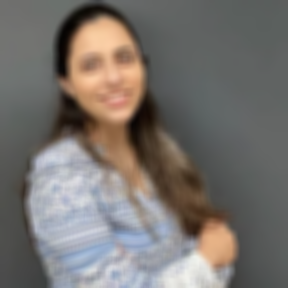

In [127]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(img, -1, kernel_blur)

# verificando o resultado
cv2_imshow(blurred)

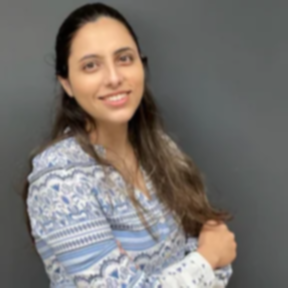

In [128]:
# utilizando o GaussianBlur, que já é implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(img, (5,5), 0)

# visualizando a imagem
cv2_imshow(gaussian_blurred)

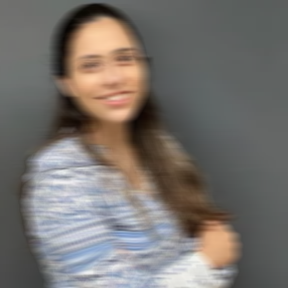

In [129]:
# implementando o filtro
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(img, -1, kernel_motion_blur)

# plotando a imagem
cv2_imshow(motion_blurred)

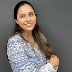

(72, 72, 3)


In [116]:
redu_image = cv2.imread('sarah.webp', cv2.IMREAD_REDUCED_COLOR_4)
cv2_imshow(redu_image)
print(redu_image.shape)

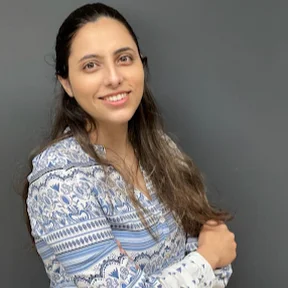

In [117]:
mask_image = cv2.imread("sarah.webp")
cv2_imshow(mask_image)

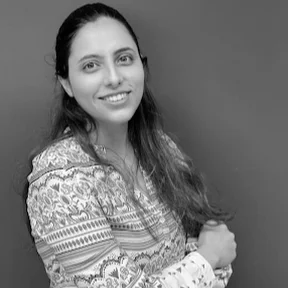

In [136]:
# converter RGB - Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

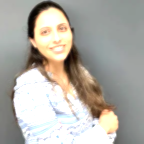

In [147]:
# filtro de Sépia
sarah = cv2.imread("sarah.webp", cv2.IMREAD_REDUCED_COLOR_2)
kernel = np.array([[0.111, 0.111, 0.111],
                   [0.111, 0.111, 0.130],
                   [0.200, 0.600, 0.111]])
sepia_image = cv2.filter2D(sarah, -1, kernel)
cv2_imshow(sepia_image)

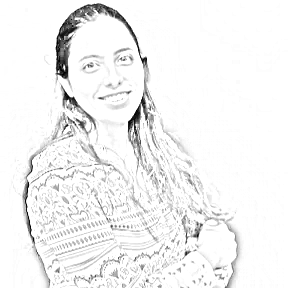

In [148]:
# criar Sketch

# etapa 1
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_image)

# etapa 2
inv_gray_image = 255 - gray_image
# cv2_imshow(inv_gray_image)

# etapa 3
blur_image = cv2.GaussianBlur(inv_gray_image, (21, 21), 0, 0)
# cv2_imshow(blur_image)

# etapa 4
sketch_image = cv2.divide(gray_image, 255 - blur_image, scale=256)
cv2_imshow(sketch_image)

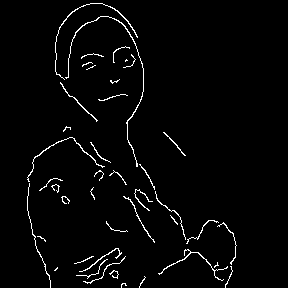

In [149]:
# Canny
blur_image = cv2.GaussianBlur(img, (11, 11), 0)
canny_image = cv2.Canny(blur_image, 100, 150)
cv2_imshow(canny_image)